In [1]:
import numpy
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 7.1 A dataset of tiny images

In [6]:
from torchvision import datasets
data_path = 'data/photos/cifar10/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

Files already downloaded and verified
Files already downloaded and verified


In [7]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [8]:
len(cifar10)

50000

In [9]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1961C6D0F40>, 1, 'automobile')

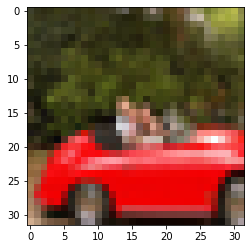

In [10]:
plt.imshow(img)
plt.show()

In [11]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'Enum',
 'F',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'List',
 'Normalize',
 'Optional',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'Tensor',
 'ToPILImage',
 'ToTensor',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'math',
 'torch',
 'transforms']

In [12]:
from torchvision import transforms
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [13]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [14]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

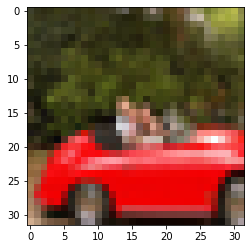

In [17]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [18]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [19]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [20]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [22]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


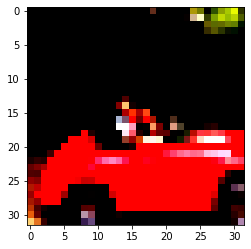

In [23]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 7.2 Distinguishing birds from airplanes

In [57]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [60]:
label_map = {0: 0, 2: 1}

In [ ]:
cifar2 = [(img, label_map[label])
    for img, label in cifar10
    if label in [0, 2]
]
cifar2_val = [(img, label_map[label])
    for img, label in cifar10_val
    if label in [0, 2]
]

In [61]:
n_out = 2

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


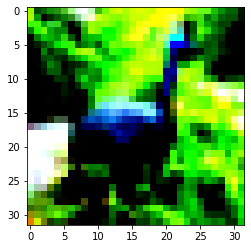

In [63]:
img, _ = cifar2[0]
img
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [64]:
img_batch = img.view(-1).unsqueeze(0)

In [65]:
out = model(img_batch)
out

tensor([[0.4080, 0.5920]], grad_fn=<SoftmaxBackward>)

In [67]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [69]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [70]:
loss = nn.NLLLoss()

In [72]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.8290, grad_fn=<NllLossBackward>)

In [80]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

In [82]:
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.436664
Epoch: 1, Loss: 0.636299
Epoch: 2, Loss: 0.333556
Epoch: 3, Loss: 0.508862
Epoch: 4, Loss: 0.376987
Epoch: 5, Loss: 0.454044
Epoch: 6, Loss: 0.338801
Epoch: 7, Loss: 0.454610
Epoch: 8, Loss: 0.553609
Epoch: 9, Loss: 0.333337
Epoch: 10, Loss: 0.310631
Epoch: 11, Loss: 0.409928
Epoch: 12, Loss: 0.518283
Epoch: 13, Loss: 0.546941
Epoch: 14, Loss: 0.446492
Epoch: 15, Loss: 0.265478
Epoch: 16, Loss: 0.336106
Epoch: 17, Loss: 0.122087
Epoch: 18, Loss: 0.209137
Epoch: 19, Loss: 0.371351
Epoch: 20, Loss: 0.227790
Epoch: 21, Loss: 0.330823
Epoch: 22, Loss: 0.238231
Epoch: 23, Loss: 0.509432
Epoch: 24, Loss: 0.184251
Epoch: 25, Loss: 0.132178
Epoch: 26, Loss: 0.388574
Epoch: 27, Loss: 0.139842
Epoch: 28, Loss: 0.272047
Epoch: 29, Loss: 0.102132
Epoch: 30, Loss: 0.078983
Epoch: 31, Loss: 0.233821
Epoch: 32, Loss: 0.228613
Epoch: 33, Loss: 0.270173
Epoch: 34, Loss: 0.214290
Epoch: 35, Loss: 0.118945
Epoch: 36, Loss: 0.059201
Epoch: 37, Loss: 0.402442
Epoch: 38, Loss: 0.186

In [83]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Accuracy: %f", correct / total)

Accuracy: %f 0.822


In [84]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1))

In [87]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)
loss_fn = nn.CrossEntropyLoss()

In [89]:
numel_list = [p.numel()
    for p in model.parameters()
        if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [95]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.593212
Epoch: 1, Loss: 0.343772
Epoch: 2, Loss: 0.331254
Epoch: 3, Loss: 0.231917
Epoch: 4, Loss: 0.218788
Epoch: 5, Loss: 0.291905
Epoch: 6, Loss: 0.453546
Epoch: 7, Loss: 0.332087
Epoch: 8, Loss: 0.301313
Epoch: 9, Loss: 0.776738
Epoch: 10, Loss: 0.280469
Epoch: 11, Loss: 0.606748
Epoch: 12, Loss: 0.636134
Epoch: 13, Loss: 0.224692
Epoch: 14, Loss: 0.303341
Epoch: 15, Loss: 0.172704
Epoch: 16, Loss: 0.333430
Epoch: 17, Loss: 0.266715
Epoch: 18, Loss: 0.483885
Epoch: 19, Loss: 0.147920
Epoch: 20, Loss: 0.165667
Epoch: 21, Loss: 0.186220
Epoch: 22, Loss: 0.447807
Epoch: 23, Loss: 0.301875
Epoch: 24, Loss: 0.120106
Epoch: 25, Loss: 0.479810
Epoch: 26, Loss: 0.297185
Epoch: 27, Loss: 0.249348
Epoch: 28, Loss: 0.379552
Epoch: 29, Loss: 0.049805
Epoch: 30, Loss: 0.149588
Epoch: 31, Loss: 0.226848
Epoch: 32, Loss: 0.096227
Epoch: 33, Loss: 0.293476
Epoch: 34, Loss: 0.080667
Epoch: 35, Loss: 0.045969
Epoch: 36, Loss: 0.503711
Epoch: 37, Loss: 0.095853
Epoch: 38, Loss: 0.255

## 1. Use torchvision to implement random cropping of the data.
### a. How are the resulting images different from the uncropped originals?
It is cropped at a random position, with the given size 24x24.
### b. What happens when you request the same image a second time?
It has already been cropped.
### c. What is the result of training using randomly cropped images?
It learns slower, because of the loss of inputs. Its accuracy fell from 82.2% to 78.7%.

In [129]:
from torchvision import datasets
from torchvision import transforms
data_path = 'data/photos/cifar10/'

ex_cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
ex_cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

trans_ex_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomCrop(24),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ])
)
trans_ex_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomCrop(24),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ])
)

class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

Files already downloaded and verified
Files already downloaded and verified


In [130]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

ex_cifar2 = [(img, label_map[label])
    for img, label in ex_cifar10
    if label in [0, 2]
]
ex_cifar2_val = [(img, label_map[label])
    for img, label in ex_cifar10_val
    if label in [0, 2]
]
trans_ex_cifar2 = [(img, label_map[label])
    for img, label in trans_ex_cifar10
    if label in [0, 2]
]
trans_ex_cifar2_val = [(img, label_map[label])
    for img, label in trans_ex_cifar10_val
    if label in [0, 2]
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


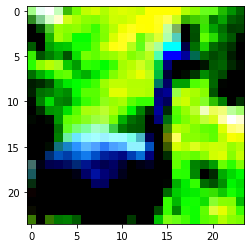

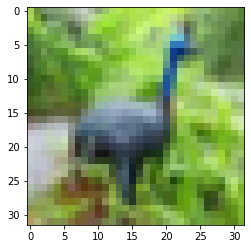

In [131]:
img, _ = trans_ex_cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

img_2, _ = ex_cifar2[0]
plt.imshow(img_2)

In [133]:
model = nn.Sequential(
            nn.Linear(1728, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(trans_ex_cifar2, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.396793
Epoch: 1, Loss: 0.553475
Epoch: 2, Loss: 0.213062
Epoch: 3, Loss: 0.441179
Epoch: 4, Loss: 0.948763
Epoch: 5, Loss: 0.496299
Epoch: 6, Loss: 0.255522
Epoch: 7, Loss: 0.491535
Epoch: 8, Loss: 0.533041
Epoch: 9, Loss: 0.485353
Epoch: 10, Loss: 0.362708
Epoch: 11, Loss: 0.136792
Epoch: 12, Loss: 0.493720
Epoch: 13, Loss: 0.305119
Epoch: 14, Loss: 0.482004
Epoch: 15, Loss: 0.276882
Epoch: 16, Loss: 0.357678
Epoch: 17, Loss: 0.208348
Epoch: 18, Loss: 0.474925
Epoch: 19, Loss: 0.342854
Epoch: 20, Loss: 0.268041
Epoch: 21, Loss: 0.558606
Epoch: 22, Loss: 0.648115
Epoch: 23, Loss: 0.235992
Epoch: 24, Loss: 0.595192
Epoch: 25, Loss: 0.216520
Epoch: 26, Loss: 0.437439
Epoch: 27, Loss: 0.227655
Epoch: 28, Loss: 0.186805
Epoch: 29, Loss: 0.347439
Epoch: 30, Loss: 0.315216
Epoch: 31, Loss: 0.253007
Epoch: 32, Loss: 0.251036
Epoch: 33, Loss: 0.407110
Epoch: 34, Loss: 0.208964
Epoch: 35, Loss: 0.158125
Epoch: 36, Loss: 0.148769
Epoch: 37, Loss: 0.196071
Epoch: 38, Loss: 0.312

In [134]:
val_loader = torch.utils.data.DataLoader(trans_ex_cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Accuracy: %f", correct / total)

Accuracy: %f 0.7865


## 2. Switch loss functions (perhaps MSE).
### Does the training behavior change?

In [164]:
model = nn.Sequential(
            nn.Linear(1728, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

train_loader = torch.utils.data.DataLoader(trans_ex_cifar2, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.513458
Epoch: 1, Loss: 0.418693
Epoch: 2, Loss: 0.646755
Epoch: 3, Loss: 0.384963
Epoch: 4, Loss: 0.569725
Epoch: 5, Loss: 0.435284
Epoch: 6, Loss: 0.373274
Epoch: 7, Loss: 0.450445
Epoch: 8, Loss: 0.491275
Epoch: 9, Loss: 0.456076
Epoch: 10, Loss: 0.426660
Epoch: 11, Loss: 0.338811
Epoch: 12, Loss: 0.392339
Epoch: 13, Loss: 0.332771
Epoch: 14, Loss: 0.377429
Epoch: 15, Loss: 0.371853


KeyboardInterrupt: 

In [ ]:
val_loader = torch.utils.data.DataLoader(trans_ex_cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Accuracy: %f", correct / total)

In [163]:
model = nn.Sequential(
            nn.Linear(1728, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 32),
            nn.Tanh(),
            nn.Linear(32, 2),
            nn.LogSoftmax(dim=1)
    )

train_loader = torch.utils.data.DataLoader(trans_ex_cifar2, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

RuntimeError: The size of tensor a (2) must match the size of tensor b (64) at non-singleton dimension 1

In [148]:
val_loader = torch.utils.data.DataLoader(trans_ex_cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Accuracy: %f", correct / total)

Accuracy: %f 0.7785


## 3. Is it possible to reduce the capacity of the network enough that it stops overfitting?
### How does the model perform on the validation set when doing so?
The accuracy approaches 80%.
The optimal neural network size is probably when number of leaves decrease by an approximate ratio per layer.

In [167]:
model = nn.Sequential(
            nn.Linear(1728, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

train_loader = torch.utils.data.DataLoader(trans_ex_cifar2, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.500457
Epoch: 1, Loss: 0.616702
Epoch: 2, Loss: 0.425903
Epoch: 3, Loss: 0.319430
Epoch: 4, Loss: 0.559356
Epoch: 5, Loss: 0.455204
Epoch: 6, Loss: 0.324271
Epoch: 7, Loss: 0.924560
Epoch: 8, Loss: 0.455657
Epoch: 9, Loss: 0.359831
Epoch: 10, Loss: 0.361095
Epoch: 11, Loss: 0.584757
Epoch: 12, Loss: 0.351216
Epoch: 13, Loss: 0.381865
Epoch: 14, Loss: 0.728024
Epoch: 15, Loss: 0.408141
Epoch: 16, Loss: 0.331553
Epoch: 17, Loss: 0.473116
Epoch: 18, Loss: 0.403648
Epoch: 19, Loss: 0.458915
Epoch: 20, Loss: 0.377204
Epoch: 21, Loss: 0.413817
Epoch: 22, Loss: 0.411432
Epoch: 23, Loss: 0.229873
Epoch: 24, Loss: 0.408054
Epoch: 25, Loss: 0.462320
Epoch: 26, Loss: 0.265643
Epoch: 27, Loss: 0.370536
Epoch: 28, Loss: 0.325125
Epoch: 29, Loss: 0.242482
Epoch: 30, Loss: 0.312433
Epoch: 31, Loss: 0.591938
Epoch: 32, Loss: 0.231843
Epoch: 33, Loss: 0.249641
Epoch: 34, Loss: 0.389867
Epoch: 35, Loss: 0.398216
Epoch: 36, Loss: 0.321066
Epoch: 37, Loss: 0.190097
Epoch: 38, Loss: 0.585

In [168]:
print(model)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Training set accuracy: %f", correct / total)

val_loader = torch.utils.data.DataLoader(trans_ex_cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Validation set accuracy: %f", correct / total)

Sequential(
  (0): Linear(in_features=1728, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=32, bias=True)
  (5): Tanh()
  (6): Linear(in_features=32, out_features=2, bias=True)
)
Training set accuracy: %f 1.0
Validation set accuracy: %f 0.7765


Sequential(  
  (0): Linear(in_features=1728, out_features=512, bias=True)  
  (1): Tanh()  
  (2): Linear(in_features=512, out_features=128, bias=True)  
  (3): Tanh()  
  (4): Linear(in_features=128, out_features=32, bias=True)  
  (5): Tanh()  
  (6): Linear(in_features=32, out_features=2, bias=True)  
)  
Training set accuracy: %f 0.9995  
Validation set accuracy: %f 0.7795

Sequential(
  (0): Linear(in_features=1728, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=16, bias=True)
  (5): Tanh()
  (6): Linear(in_features=16, out_features=2, bias=True)
)
Training set accuracy: %f 0.9997
Validation set accuracy: %f 0.774